In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
import numpy as np
import math

In [2]:
#keras,datasets digunakan untuk memanggil dataset MNIST tidak digunakan untuk library dengan memanggil fungsi-fungsinya 

#Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#Data sebelum praproses
np.set_printoptions(linewidth=200)

#split data 
num_data = 500 #dipotong hanya 500 data 
train_X = train_X[:num_data]
train_y = train_y[:num_data]

#Praproses 
new_train_X = []
for x in train_X:
    new_x = []
    for m in x:
        new_m = []
        for dd in m:
            if dd > 0:
                new_m.append(1)
            else:
                new_m.append(0)
        new_x.append(new_m)
    new_train_X.append(new_x)
X = np.array(new_train_X)

Y = to_categorical(train_y) #berfungsi untuk membuat array yang mengkategorikan masing-masing plot angka

#Data setelah dinormalisasi menjadi 0 dan 1 jika lebih besar dari 1
print("Data setelah dinormalisasi menjadi biner 0 dan 1")
print(np.array(X[1]))

#mengubah matrix menjadi flat matrix satu dimensi 
X= np.array([x.flatten() for x in X]) 

11490434/11490434 [==============================] - 5s 0us/step
Data setelah dinormalisasi menjadi biner 0 dan 1
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 

In [3]:
#Processing
inpu = X
target = Y

#configuration
num_input = inpu.shape[1]
num_hidden = 30
num_output = target.shape[1]

#fungsi sigmoid 
def sigmoid(x):
    return (1/(1+np.exp(-x)))
sig = np.vectorize(sigmoid)

#Inisialisasi bobot dan bias 
#hidden layer
b_hidden = np.random.uniform(low=-1, high=1, size=(num_hidden))
w_hidden = np.random.uniform(low=-1, high=1, size=(num_input, num_hidden))

#output layer 
b_output = np.random.uniform(low=-1, high=1, size=(num_output)) 
w_output = np.random.uniform(low=-1, high=1, size=(num_hidden, num_output))


#Array untuk menyimpan loss dan akurasinya 
loss_value = []
acc_values = []

lr = 0.5 #learning rate
epochs = 100 #panjang epochs

In [4]:
#Proses epochs 
for b in range(epochs):
    mse = 0    
    new_target = np.zeros(target.shape)

    for idx, inp in enumerate(inpu):
        #feedforward
        #hidden layer
        o_hidden = np.matmul(inpu[idx], w_hidden) + b_hidden
        o_hidden = sig(o_hidden)

        #output layer  
        o_output = np.matmul(o_hidden, w_output) 
        o_output = sig(o_output)

        #error
        error = target[idx] - o_output
        mse= mse +  (np.sum((error**2))/error.shape)
        new_target[idx] = o_output.round()
 
        #Backpropagation 
        eh = error @ w_output.T
        w_output = w_output + (lr* ((error*o_output)*(1-o_output))*o_hidden[np.newaxis].T)
        w_hidden = w_hidden + (lr*((eh*o_hidden*(1-o_hidden)) *inpu[idx][np.newaxis].T))

        b_output = b_output + (lr* ((error*o_output*(1-o_output))))
        b_hidden = b_hidden + (lr*((eh*o_hidden*(1-o_hidden))))
    mse = (mse/inpu.shape[0])
    

    delta = np.absolute(target-new_target)
    acc = 1 - np.average([np.max(m) for m in delta])
    
    acc_values.append(acc)
    loss_value.append(mse)
    print(f"Epoch :{b}, error: {mse}, accuracy: {acc}")
        

Epoch :0, error: [0.07303876], accuracy: 0.19599999999999995
Epoch :1, error: [0.04200532], accuracy: 0.55
Epoch :2, error: [0.03396673], accuracy: 0.6599999999999999
Epoch :3, error: [0.02321349], accuracy: 0.768
Epoch :4, error: [0.01951083], accuracy: 0.806
Epoch :5, error: [0.01722785], accuracy: 0.838
Epoch :6, error: [0.01490088], accuracy: 0.864
Epoch :7, error: [0.01192376], accuracy: 0.89
Epoch :8, error: [0.00932557], accuracy: 0.924
Epoch :9, error: [0.00614351], accuracy: 0.956
Epoch :10, error: [0.00599791], accuracy: 0.95
Epoch :11, error: [0.00447535], accuracy: 0.96
Epoch :12, error: [0.00372679], accuracy: 0.97
Epoch :13, error: [0.00321797], accuracy: 0.974
Epoch :14, error: [0.00314306], accuracy: 0.97
Epoch :15, error: [0.00272412], accuracy: 0.976
Epoch :16, error: [0.00223492], accuracy: 0.982
Epoch :17, error: [0.00203065], accuracy: 0.984
Epoch :18, error: [0.0018206], accuracy: 0.986
Epoch :19, error: [0.00178449], accuracy: 0.988
Epoch :20, error: [0.00158045]

In [5]:
#Testing Process

new_target_test = np.zeros(target.shape)

#feedforward
for idx, inp in enumerate(inpu):
    o_hidden= np.matmul(inpu[idx], w_hidden) + b_hidden
    o_hidden = sig(o_hidden)
    o_output= np.matmul(o_hidden, w_output)
    o_output = sig(o_output)

    new_target_test[idx] = o_output.round()


Reshape input:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0

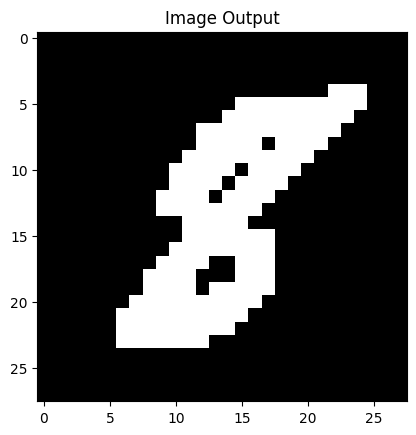

In [8]:
idx_test =  202

#Reshape dari array flat 1 dimensi ke 3 dimensi 
reshape_input = inpu.reshape(num_data, 28, 28)
print("Reshape input:")
print(reshape_input[idx_test])

#Test
test_target = new_target_test[idx_test]
print(f"Test target: {test_target}")

#Print label target 
max_index_row = np.argmax(test_target)
print(f"Hasil Classifikasi: {max_index_row}")


plt.imshow(reshape_input[idx_test], cmap=plt.get_cmap('gray'))
plt.title("Image Output")
plt.show()

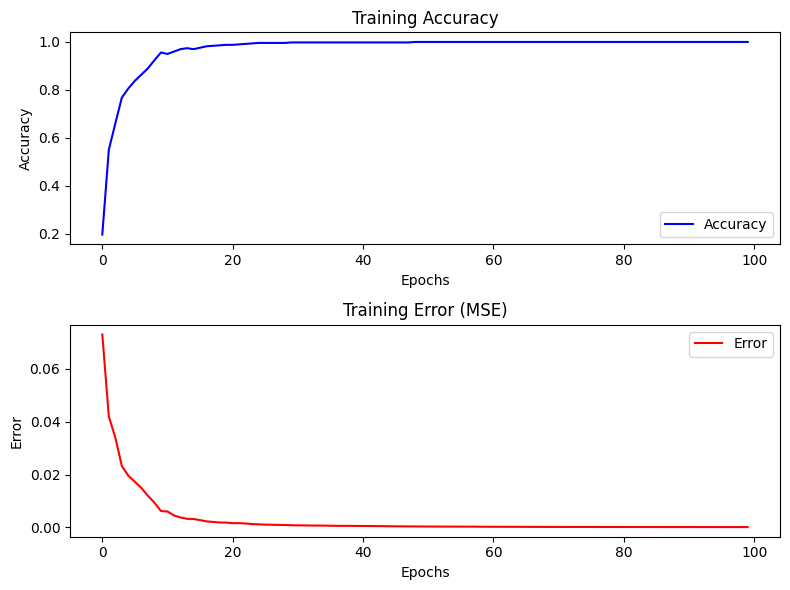

In [14]:
import matplotlib.pyplot as plt

# Your existing code for training and recording loss and accuracy

# Assuming you have 'loss_value' and 'acc_value' lists
epochs = range( len(loss_value))

# Create a figure with two subplots (one for accuracy and one for error)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Plot accuracy
ax1.plot(epochs, acc_values, 'b', label='Accuracy')
ax1.set_title('Training Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot error
ax2.plot(epochs, loss_value, 'r', label='Error')
ax2.set_title('Training Error (MSE)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Error')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
